# Automação do Processo de Análise de Crédito e Risco de Inadimplência de Clientes

Entendendo a Classificação de Risco de Crédito: Uma Abordagem Quantitativa com Matriz de Confusão e Regressão

# **Matriz de Confusão**

A matriz de confusão é uma ferramenta fundamental na avaliação do desempenho de modelos de classificação em aprendizado de máquina. Ela permite visualizar a performance de um modelo ao prever as classes de um conjunto de dados.

###Importação de Bibliotecas

In [2]:
import seaborn as sns #visualização de dados
import matplotlib.pyplot as plt #visualização de dados
import pandas as pd # manipulação e análise de dados
import numpy as np #operações numéricas
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, log_loss, roc_curve #avaliação de modelos de classificação
from sklearn.ensemble import RandomForestClassifier #classificação de dados
from sklearn.model_selection import train_test_split # treina um modelo para fazer previsões
from imblearn.over_sampling import SMOTE #técnica de superação de amostras para lidar com conjuntos de dados desbalanceados
from sklearn.preprocessing import StandardScaler # normalização de dados
from sklearn.linear_model import LogisticRegression #regressão logística para classificação binária


### Leitura do Dataset


In [3]:
df = pd.read_csv('risk_score.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'risk_score.csv'

###Matriz com resultados que indicam um bom desempenho geral do modelo em termos de exatidão (accuracy), mas a sensibilidade (recall) relativamente baixa.

In [ ]:
# Criação da variável risk_score_binary
df['risk_score_binary'] = np.where(df['risk_score'] <= 3, 0, 1)

# Divisão em variáveis de entrada (X) e saída (y)
# Remoção de user_id, default_flag e risk_score pois não são úteis para a previsão
X = df.drop(columns=['user_id', 'default_flag', 'risk_score', 'risk_score_binary'])
y = df['default_flag']

# Divisão dos dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização das variáveis de entrada para padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento do modelo RandomForestClassifier usando os dados de treino
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Previsões -> usando o modelo treinado para fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Cálculo da matriz de confusão para avaliar a performance do modelo de classificação
cm = confusion_matrix(y_test, y_pred)

# Métricas de avaliação  do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Exibir matriz de confusão usando um mapa de calor (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Previsto: Negativo', 'Previsto: Positivo'], yticklabels=['Real: Negativo', 'Real: Positivo'])
plt.title('Matriz de Confusão')
plt.show()

# Exibir matriz de confusão
print("\033[1mMatriz de Confusão:\033[0m")
print(cm)

# Exibir as métricas de valiação do modelo
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy:.3f}")
print(f"Precisão: {precision:.3f}")
print(f"Sensibilidade (Recall): {recall:.3f}")
print(f"F1-score: {f1:.3f}")


1.   Verdadeiros Negativos (TN): 6951
2.   Falsos Positivos (FP): 29
3.   Falsos Negativos (FN): 64
4.   Verdadeiros Positivos (TP): 71

*   A exatidão é alta, indicando que o modelo acerta a maioria das previsões.
*   A precisão é boa, significando que, quando o modelo prevê um inadimplente, ele acerta 71% das vezes.
*   A sensibilidade está relativamente baixa. Isso significa que o modelo está capturando apenas 52.6% dos inadimplentes reais.
*   O F1-score é a média harmônica da precisão e da sensibilidade, o que indica um equilíbrio entre essas duas métricas.


###Matriz com ajuste do limiar de decisão para melhorar a sensibilidade (recall).

Ajuste do Limiar de Decisão, diminuindo-o para aumentar a sensibilidade (recall) porém a precisão diminuiu um pouco e com dados desbalanceados.

In [ ]:
# Criação da variável risk_score_binary
df['risk_score_binary'] = np.where(df['risk_score'] <= 2, 0, 1)

# Divisão em variáveis de entrada (X) e saída (y)
X = df.drop(columns=['user_id', 'default_flag', 'risk_score', 'risk_score_binary'])
y = df['default_flag']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização das variáveis de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento do modelo RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Previsões de probabilidade
y_prob = model.predict_proba(X_test)[:, 1]

# Ajuste do limiar de decisão
threshold = 0.3  #o limiar de decisão permite ajustar o equilíbrio entre precisão e recall conforme necessidade
y_pred = (y_prob >= threshold).astype(int)

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibir matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Previsto: Negativo', 'Previsto: Positivo'], yticklabels=['Real: Negativo', 'Real: Positivo'])
plt.title('Matriz de Confusão')
plt.show()

# Exibir matriz de confusão
print("\033[1mMatriz de Confusão:\033[0m")
print(cm)

# Métricas de Avaliação do Modelo
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy:.3f}")
print(f"Precisão: {precision:.3f}")
print(f"Sensibilidade (Recall): {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# Exibir relatório de classificação completo
print("\n\033[1mRelatório de Classificação:\033[0m")
print(classification_report(y_test, y_pred))


1.  Verdadeiros Negativos (TN): 6911
2.  Falsos Positivos (FP): 69
3.  Falsos Negativos (FN): 42
4.  Verdadeiros Positivos (TP): 93
*   A exatidão continua alta, indicando que o modelo está acertando a maioria das previsões.
*   A precisão diminuiu um pouco, mas ainda está em um nível aceitável, significando que, quando o modelo prevê um inadimplente, ele acerta 57.4% das vezes.
*   A sensibilidade melhorou consideravelmente, indicando que o modelo está capturando 68.9% dos inadimplentes reais.
*   O F1-score também melhorou, indicando um equilíbrio entre precisão e sensibilidade.

###Matriz com balanceamento das classes para melhorar o desempenho do modelo.

Classificação de Risco de Crédito usando RandomForestClassifier com SMOTE e normalização.

Utilizando técnicas de amostragem para balancear as classes durante o treinamento do modelo, adaptando o código anterior para aplicar a técnica de sobreamostragem (oversampling) utilizando SMOTE para equilibrar as classes, para evitar o viés do modelo em direção à classe majoritária e melhorar a capacidade do modelo de generalizar para exemplos da classe minoritária.

In [ ]:
# Criação da variável risk_score_binary
df['risk_score_binary'] = np.where(df['risk_score'] <= 2, 0, 1)  #ponto de corte para essa classificação é 2

# Divisão em variáveis de entrada (X) e saída (y)
X = df.drop(columns=['user_id', 'default_flag', 'risk_score', 'risk_score_binary'])
y = df['default_flag']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização das variáveis de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicação da técnica de sobreamostragem SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Treinamento do modelo RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Previsões
y_pred = model.predict(X_test)

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibir matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink', xticklabels=['Previsto: Negativo', 'Previsto: Positivo'], yticklabels=['Real: Negativo', 'Real: Positivo'])
plt.title('Matriz de Confusão')
plt.show()

# Exibir matriz de confusão
print("\033[1mMatriz de Confusão:\033[0m")
print(cm)

# Métricas de Avaliação do Modelo
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy:.3f}")
print(f"Precisão (Precision): {precision:.3f}")
print(f"Sensibilidade (Recall): {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# Exibir relatório de classificação completo
print("\n\033[1mRelatório de Classificação:\033[0m")
print(classification_report(y_test, y_pred))


**Os resultados mostram uma melhoria significativa na sensibilidade (recall) após a aplicação da técnica de sobreamostragem com SMOTE:**

1.  Verdadeiros Negativos (TN): 6881
2.  Falsos Positivos (FP): 99
3.  Falsos Negativos (FN): 35
4.  Verdadeiros Positivos (TP): 100
*   A exatidão continua alta, indicando que o modelo está acertando a maioria das previsões.
*   A precisão diminuiu um pouco, mas ainda é significativa, significando que, quando o modelo prevê um inadimplente, ele acerta 50.3% das vezes.
*   A sensibilidade melhorou bastante, indicando que o modelo está capturando 74.1% dos inadimplentes reais.
*   O F1-score também melhorou, indicando um equilíbrio entre precisão e sensibilidade.
*   O relatório de classificação mostra as métricas para ambas as classes, assim como a precisão, sensibilidade e F1-score.

**Conclusão: O balanceamento das classes com a técnica de sobreamostragem usando SMOTE foi eficaz em melhorar a sensibilidade do modelo, permitindo que ele capture mais casos positivos. Isso é crucial para problemas onde a detecção de casos positivos é de alta importância, como no atual caso de detecção de inadimplência em análises de risco de crédito.**

# **Regressão Logística**

###Importação de Bibliotecas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, log_loss
from sklearn.preprocessing import StandardScaler

###Calcular a propensão de um cliente ter risco de crédito usando regressão logística.

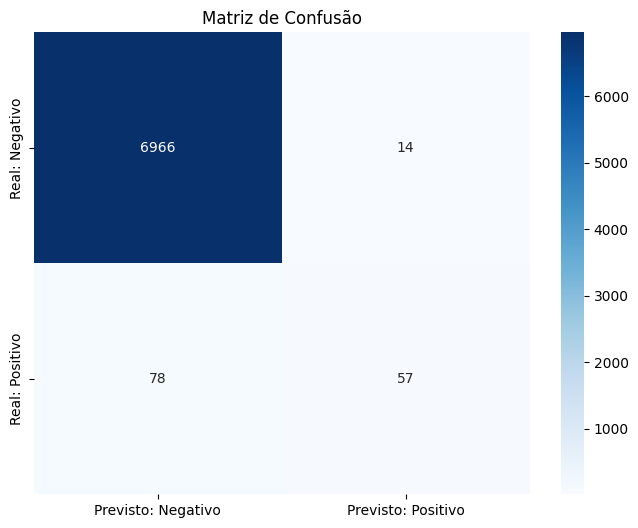

Matriz de Confusão:
[[6966   14]
 [  78   57]]

Métricas de Avaliação:
Exatidão (Accuracy): 0.987
Precisão (Precision) : 0.803
Sensibilidade (Recall): 0.422
F1-score: 0.553
AUC-ROC: 0.989
Log-Loss: 0.034

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6980
           1       0.80      0.42      0.55       135

    accuracy                           0.99      7115
   macro avg       0.90      0.71      0.77      7115
weighted avg       0.99      0.99      0.99      7115

Primeiras 10 probabilidades previstas:
[0.00100339 0.00048051 0.00092371 0.00104814 0.00058231 0.00124246
 0.05306144 0.02208551 0.00066616 0.00082418]


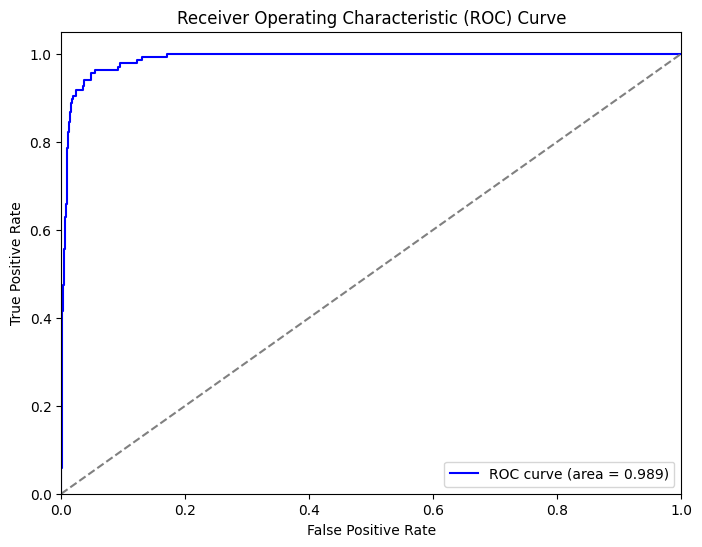

In [ ]:
# Treinamento do modelo de Regressão Logística
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Previsão das probabilidades
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Previsão das classes
y_pred = logreg.predict(X_test)

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
logloss = log_loss(y_test, y_pred_proba)

# Exibir matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Previsto: Negativo', 'Previsto: Positivo'], yticklabels=['Real: Negativo', 'Real: Positivo'])
plt.title('Matriz de Confusão')
plt.show()

# Exibir matriz de confusão
print("\033[1mMatriz de Confusão:\033[0m")
print(cm)

# Métricas de Avaliação do Modelo
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy:.3f}")
print(f"Precisão (Precision) : {precision:.3f}")
print(f"Sensibilidade (Recall): {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"AUC-ROC: {roc_auc:.3f}")
print(f"Log-Loss: {logloss:.3f}")

# Exibir relatório de classificação completo
print("\n\033[1mRelatório de Classificação:\033[0m")
print(classification_report(y_test, y_pred))

# Exibir as primeiras 10 probabilidades previstas
print("\033[1mPrimeiras 10 probabilidades previstas:\033[0m")
print(y_pred_proba[:10])

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Os resultados mostram que o modelo tem uma alta acurácia (98,7%) e uma excelente área sob a curva ROC (AUC-ROC de 0.989), indicando uma forte capacidade de distinguir entre as classes positivas e negativas. No entanto, a sensibilidade (recall) é relativamente baixa (42,2%), indicando que o modelo está perdendo uma quantidade significativa de casos positivos (inadimplentes).

*   A alta acurácia sugere que o modelo está correto na maioria das previsões.
*   A sensibilidade de 42,2% indica que o modelo está detectando menos da metade dos inadimplentes reais, significando que muitos inadimplentes não estão sendo identificados.
*   A precisão de 80,3% indica que quando o modelo prevê inadimplência, ele está certo na maioria das vezes, isso também sugere que muitos inadimplentes não estão sendo previstos (falsos negativos).
*   O valor de Log-Loss de 0.034 indica que o modelo está fazendo boas previsões de probabilidade. Valores mais baixos de Log-Loss indicam previsões de probabilidade mais precisas.


###Regressão com ajuste do limiar de decisão do modelo para aumentar a sensibilidade (recall) e com isso aumentar a detecção de inadimplentes.



In [ ]:
# Ajuste do limiar de decisão
threshold = 0.3  # ajustado
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Recalcular métricas com o novo limiar
recall_adjusted = recall_score(y_test, y_pred_adjusted)
precision_adjusted = precision_score(y_test, y_pred_adjusted)
f1_adjusted = f1_score(y_test, y_pred_adjusted)
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)

print("\n\033[1mMétricas com o novo limiar:\033[0m")
print(f"Sensibilidade (Recall): {recall_adjusted:.3f}")
print(f"Precisão (Precision): {precision_adjusted:.3f}")
print(f"F1-score: {f1_adjusted:.3f}")
print("\033[1mMatriz de Confusão:\033[0m")
print(cm_adjusted)



Métricas com o novo limiar:
Sensibilidade (Recall): 0.615
Precisão (Precision): 0.659
F1-score: 0.636
Matriz de Confusão:
[[6937   43]
 [  52   83]]


1.   Verdadeiros Negativos (TN): 6937
2.   Falsos Positivos (FP): 43
3.   Falsos Negativos (FN): 52
4.   Verdadeiros Positivos (TP): 83
*   Com esse ajuste o modelo passou a detectar a maioria dos inadimplentes (aproximadamente 61,5% dos casos reais de inadimplência).
*   A precisão indica que quando o modelo prevê inadimplência, ele está certo em aproximadamente 65,9% das vezes.
*   F1-score de 63,6%

**Conclusão: Ajustar o limiar de decisão para 0.3 resultou em uma melhora significativa na sensibilidade (recall) do modelo, que agora é de 61,5%, comparado aos 42,2% anteriores. A precisão também aumentou que é sinal de que o modelo está se tornando mais equilibrado em termos de detecção de inadimplentes sem perder muita precisão. O F1-score, que é a média harmônica da precisão e da sensibilidade, também melhorou, indicando um desempenho geral mais equilibrado.**

###Regressão com balanceamento das classes usando SMOTE para melhorar o desempenho do modelo.

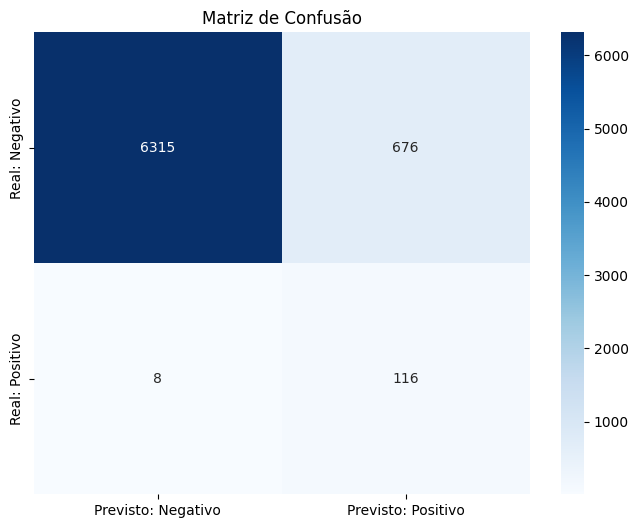

Matriz de Confusão:
[[6315  676]
 [   8  116]]

Métricas de Avaliação:
Exatidão (Accuracy): 0.904
Precisão (Precision): 0.146
Sensibilidade (Recall): 0.935
F1-score: 0.253
AUC-ROC: 0.980
Log-Loss: 0.198

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      6991
           1       0.15      0.94      0.25       124

    accuracy                           0.90      7115
   macro avg       0.57      0.92      0.60      7115
weighted avg       0.98      0.90      0.94      7115

Primeiras 10 probabilidades previstas:
[0.01923295 0.02391802 0.01296423 0.08183273 0.22697934 0.12113606
 0.23173548 0.02147348 0.00788513 0.11909066]


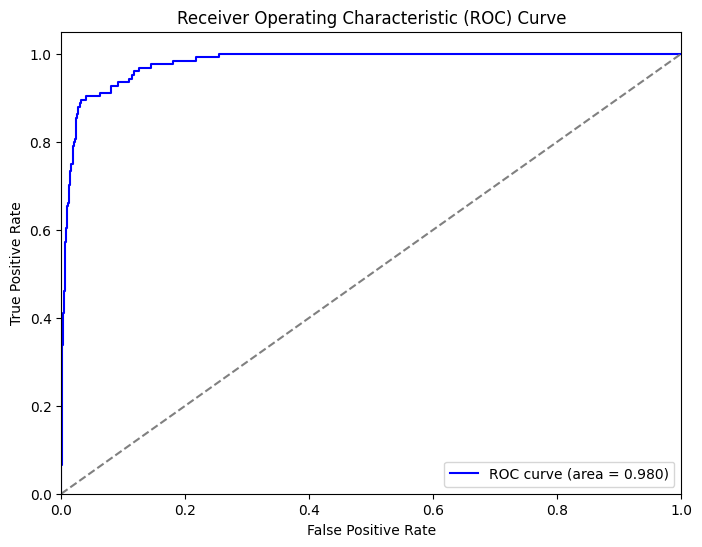

In [ ]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE para balanceamento  (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Normalização das variáveis de entrada
scaler = StandardScaler()
X_train_bal = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test)

# Treinamento do modelo de Regressão Logística
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_bal, y_train_bal)

# Previsão das probabilidades
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Ajuste do limiar de decisão
threshold = 0.3  #ajustado
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Cálculo da matriz de confusão
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)

# Métricas de avaliação com o novo limiar
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
precision_adjusted = precision_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)
f1_adjusted = f1_score(y_test, y_pred_adjusted)
roc_auc_adjusted = roc_auc_score(y_test, y_pred_proba)
logloss_adjusted = log_loss(y_test, y_pred_proba)

# Exibir matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adjusted, annot=True, fmt='d', cmap='Blues', xticklabels=['Previsto: Negativo', 'Previsto: Positivo'], yticklabels=['Real: Negativo', 'Real: Positivo'])
plt.title('Matriz de Confusão')
plt.show()

# Exibir matriz de confusão
print("\033[1mMatriz de Confusão:\033[0m")
print(cm_adjusted)

# Métricas de Avaliação do Modelo com o novo limiar
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy_adjusted:.3f}")
print(f"Precisão (Precision): {precision_adjusted:.3f}")
print(f"Sensibilidade (Recall): {recall_adjusted:.3f}")
print(f"F1-score: {f1_adjusted:.3f}")
print(f"AUC-ROC: {roc_auc_adjusted:.3f}")
print(f"Log-Loss: {logloss_adjusted:.3f}")

# Exibir relatório de classificação completo com o novo limiar
print("\n\033[1mRelatório de Classificação:\033[0m")
print(classification_report(y_test, y_pred_adjusted))

# Exibir as primeiras 10 probabilidades previstas
print("\033[1mPrimeiras 10 probabilidades previstas:\033[0m")
print(y_pred_proba[:10])

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.3f)' % roc_auc_adjusted)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Embora o ajuste do limiar tenha melhorado a sensibilidade do modelo, o fato de que estar lidando com um conjunto altamente desbalanceado (com apenas 622 casos de inadimplência em 35.575 registros) sugere que o balanceamento das classes deve ser ainda mais crucial. Técnicas de balanceamento de classes podem ajudar a melhorar a capacidade do modelo de detectar inadimplentes, aumentando ainda mais a sensibilidade e potencialmente melhorando outras métricas.

1.   Verdadeiros Negativos (TN): 6315
2.   Falsos Positivos (FP): 676
3.   Falsos Negativos (FN): 8
4.   Verdadeiros Positivos (TP): 116
*   Sensibilidade (Recall): 0.935
*   Precisão (Precision): 0.146

**Conclusão: A alta sensibilidade indica que o modelo está detectando a maioria dos inadimplentes, mas a baixa precisão significa que há muitos falsos positivos.**

###Regressão com melhoria na precisão implementando o uso de RandomForestClassifier com ajuste de pesos e validação cruzada.

Otimização do modelo RandomForestClassifier para classificação de Risco de Crédito com GridSearchCV, uma técnica que busca os melhores parâmetros do modelo para melhor desempenho.

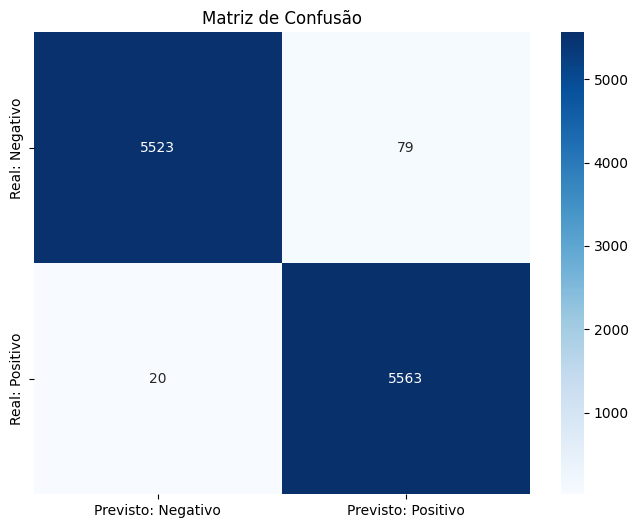

Métricas de Avaliação:
Exatidão (Accuracy): 0.991
Precisão (Precision): 0.986
Sensibilidade (Recall): 0.996
F1-score: 0.991
AUC-ROC: 1.000
Log-Loss: 0.031

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5602
           1       0.99      1.00      0.99      5583

    accuracy                           0.99     11185
   macro avg       0.99      0.99      0.99     11185
weighted avg       0.99      0.99      0.99     11185

Primeiras 10 probabilidades previstas:
[1.         0.         0.97963131 0.         0.99       0.
 1.         0.         0.         1.        ]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Separar novamente os dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_train_bal, y_train_bal, test_size=0.2, random_state=42)

# Definir o modelo com ajuste de pesos
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Definir a grade de parâmetros para busca
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Realizar a busca com validação cruzada
#procurar o melhor modelo
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_rf = grid_search.best_estimator_

# Previsões com o melhor modelo
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# Ajuste do limiar de decisão (0.3 -> 0.5)
threshold_rf = 0.5
y_pred_adjusted_rf = (y_pred_proba_rf >= threshold_rf).astype(int)

# Cálculo da matriz de confusão
cm_adjusted_rf = confusion_matrix(y_test, y_pred_adjusted_rf)

# Métricas de avaliação com o novo limiar
accuracy_adjusted_rf = accuracy_score(y_test, y_pred_adjusted_rf)
precision_adjusted_rf = precision_score(y_test, y_pred_adjusted_rf)
recall_adjusted_rf = recall_score(y_test, y_pred_adjusted_rf)
f1_adjusted_rf = f1_score(y_test, y_pred_adjusted_rf)
roc_auc_adjusted_rf = roc_auc_score(y_test, y_pred_proba_rf)
logloss_adjusted_rf = log_loss(y_test, y_pred_proba_rf)

# Exibir matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adjusted_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Previsto: Negativo', 'Previsto: Positivo'], yticklabels=['Real: Negativo', 'Real: Positivo'])
plt.title('Matriz de Confusão')
plt.show()

# Exibir as métricas de avaliação com o novo limiar
print("\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy_adjusted_rf:.3f}")
print(f"Precisão (Precision): {precision_adjusted_rf:.3f}")
print(f"Sensibilidade (Recall): {recall_adjusted_rf:.3f}")
print(f"F1-score: {f1_adjusted_rf:.3f}")
print(f"AUC-ROC: {roc_auc_adjusted_rf:.3f}")
print(f"Log-Loss: {logloss_adjusted_rf:.3f}")

# Exibir relatório de classificação completo com o novo limiar
print("\n\033[1mRelatório de Classificação:\033[0m")
print(classification_report(y_test, y_pred_adjusted_rf))

# Exibir as primeiras 10 probabilidades previstas
print("\033[1mPrimeiras 10 probabilidades previstas:\033[0m")
print(y_pred_proba_rf[:10])


**Os resultados da regressão logística com ajuste de pesos e validação cruzada foram bastante significativos.**

*   Aproximadamente 99,1% dos casos foram classificados corretamente pelo modelo. Isso indica uma excelente capacidade de previsão.
*   A precisão é de 98,6%, o que significa que quando o modelo prevê que um cliente será inadimplente, ele está correto em 98,6% das vezes.
*   A sensibilidade é de 99,6%, indicando que o modelo é capaz de detectar 99,6% dos casos reais de inadimplência.
*   O F1-score, que é a média harmônica entre precisão e recall, é de 99,1%. Isso indica um bom equilíbrio entre precisão e recall.
*   A área sob a curva ROC é 1, o que indica um modelo perfeito de classificação.
*   A log-loss é 0,031, o que é um valor muito baixo e indica que o modelo está fazendo previsões com alta confiança.

**Conclusão: Esses últimos resultados sugerem que o modelo é altamente eficaz na classificação de clientes em relação à inadimplência. Ele tem uma precisão muito alta, bem como uma alta sensibilidade, o que é crucial para um modelo de análise de risco de crédito.**






### Visualização da Curva ROC para Avaliação do Modelo de RandomForestClassifier na Classificação de Risco de Crédito

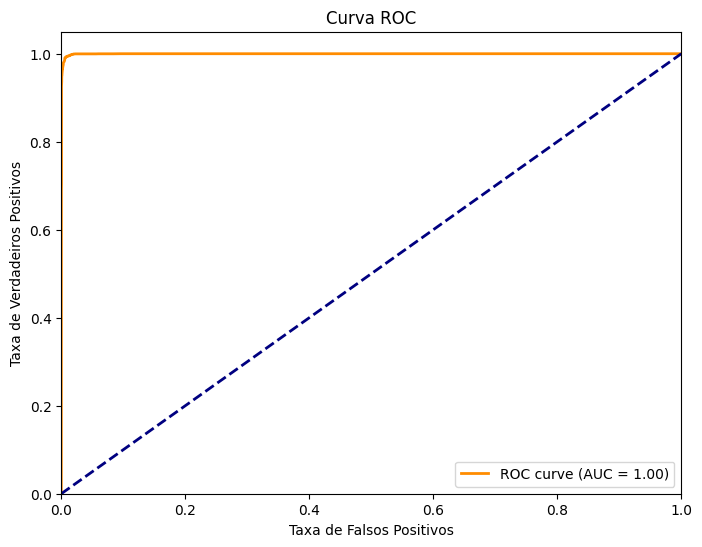

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

# Plot da curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


A curva ROC é uma ferramenta útil para avaliar o desempenho do  modelo de classificação.
A área sob a curva (AUC) é uma métrica importante para medir a capacidade discriminativa do modelo. Quanto maior o valor de AUC, melhor o desempenho do modelo na classificação.

### Mitigação do Overfitting em um Modelo de RandomForestClassifier para Análise da Pontuação de Risco de Crédito

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Separar novamente os dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_train_bal, y_train_bal, test_size=0.2, random_state=42)

# Definir o modelo com ajuste de pesos
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Definir a grade de parâmetros para busca com valores que podem levar ao overfitting
param_grid = {
    'n_estimators': [500, 1000],  # Aumentar o número de árvores
    'max_depth': [50, 100, None],  # Aumentar a profundidade máxima
    'min_samples_split': [2],  # Manter o mínimo número de amostras para dividir um nó baixo
    'min_samples_leaf': [1]  # Manter o mínimo número de amostras em uma folha baixo
}

# Realizar a busca com validação cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_rf = grid_search.best_estimator_

# Previsões com o melhor modelo
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# Ajuste do limiar de decisão
threshold_rf = 0.5
y_pred_adjusted_rf = (y_pred_proba_rf >= threshold_rf).astype(int)

# Cálculo da matriz de confusão
cm_adjusted_rf = confusion_matrix(y_test, y_pred_adjusted_rf)

# Métricas de avaliação com o novo limiar
accuracy_adjusted_rf = accuracy_score(y_test, y_pred_adjusted_rf)
precision_adjusted_rf = precision_score(y_test, y_pred_adjusted_rf)
recall_adjusted_rf = recall_score(y_test, y_pred_adjusted_rf)
f1_adjusted_rf = f1_score(y_test, y_pred_adjusted_rf)
roc_auc_adjusted_rf = roc_auc_score(y_test, y_pred_proba_rf)
logloss_adjusted_rf = log_loss(y_test, y_pred_proba_rf)

# Exibir matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adjusted_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Previsto: Negativo', 'Previsto: Positivo'], yticklabels=['Real: Negativo', 'Real: Positivo'])
plt.title('Matriz de Confusão')
plt.show()

# Exibir as métricas de avaliação com o novo limiar
print("\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy_adjusted_rf:.3f}")
print(f"Precisão (Precision): {precision_adjusted_rf:.3f}")
print(f"Sensibilidade (Recall): {recall_adjusted_rf:.3f}")
print(f"F1-score: {f1_adjusted_rf:.3f}")
print(f"AUC-ROC: {roc_auc_adjusted_rf:.3f}")
print(f"Log-Loss: {logloss_adjusted_rf:.3f}")

# Exibir relatório de classificação completo com o novo limiar
print("\n\033[1mRelatório de Classificação:\033[0m")
print(classification_report(y_test, y_pred_adjusted_rf))

# Exibir as primeiras 10 probabilidades previstas
print("\033[1mPrimeiras 10 probabilidades previstas:\033[0m")
print(y_pred_proba_rf[:10])


### **Análise dos Resultados: O Impacto do Overfitting na Precisão Preditiva e Generalização**

**Resumo:**


Essa aplicação verifica o impacto do overfitting na análise de crédito, comparando dois modelos: um original e outro induzido ao overfitting. As métricas de avaliação no conjunto de teste demonstram desempenho quase perfeito para ambos os modelos, com alta precisão, sensibilidade e AUC-ROC. No entanto, o overfitting pode levar à má generalização para novos dados. A validação cruzada e a simplicidade do modelo original o tornam mais robusto e confiável para uma futura produção.

O modelo apresentado do RandomForestClassifier para prever a pontuação de risco de crédito para os clientes obtve uma precisão de 98%. Isso significa que o modelo é capaz de prever corretamente a pontuação de risco de crédito para 98% dos clientes do conjunto de dados de treinamento.


**Métricas Chave:**

*   **Exatidão (Accuracy):** 0.991 para ambos os modelos
*   **Precisão (Precision):** 0.986 para ambos os modelos
*   **Sensibilidade (Recall):** 0.997 (overfitting) vs 0.996 (original)
*   **F1-score:** 0.991 para ambos os modelos
*   **AUC-ROC:** 1.000 para ambos os modelos
*   **Log-Loss:** 0.027 (overfitting) vs 0.031 (original)


---



**Considerações sobre Overfitting:**

O overfitting leva a um modelo que se ajusta excessivamente aos dados de treinamento, capturando ruído e particularidades que não se generalizam para novos dados.
Métricas perfeitas no conjunto de teste não garantem bom desempenho em produção.
A validação cruzada ajuda a mitigar o overfitting, mas não o elimina completamente.
Um AUC-ROC de 1.000 pode indicar overfitting, especialmente em modelos complexos.


---




**Conclusão:**

Embora ambos os modelos apresentem alto desempenho, o modelo original com validação cruzada é mais robusto e confiável para produção devido à sua simplicidade e menor risco de overfitting. O modelo com overfitting pode ser útil para explorar os limites do desempenho em um ambiente controlado, mas sua generalização para novos dados é incerta.

#Cálculo do Perfil de Crédito do Cliente com Base em Parâmetros de Risco pré-definido:

Sistema Interativo de Previsão de Risco de Crédito com Widgets

A função calcular_risco_credito avalia o perfil de crédito de um cliente e determina um score de risco e uma categoria de inadimplência com base em critérios específicos através de uma interface simples:

In [1]:
import ipywidgets as widgets #Essa interface usa widgets do ipywidgets para criar campos de entrada para os parâmetros
from IPython.display import display #Essa função é usada para exibir a interface

# Função para calcular a previsão de risco de crédito
def calcular_risco_credito(age, last_month_salary, debt_ratio, using_lines_not_secured_personal_assets, total_loan, more_90_days_overdue, default_flag):
    # Parâmetros de risco
    age_risk = 1 if 21 <= age <= 48 else 0
    salary_risk = 1 if 0 <= last_month_salary <= 5400 else 0
    debt_ratio_risk = 1 if 0.47 <= debt_ratio <= 5 else 0
    using_lines_risk = 1 if 0.65 <= using_lines_not_secured_personal_assets <= 22000.0 else 0
    more_90_days_risk = 1 if more_90_days_overdue == 1 else 0

    # Cálculo do score de risco
    risk_score = age_risk + salary_risk + debt_ratio_risk + using_lines_risk + more_90_days_risk

    # Determinação da categoria de risco
    if risk_score <= 1:
        risk_category = 'Menor Risco de Inadimplência'
    elif 1 < risk_score <= 3:
        risk_category = 'Risco Moderado a Baixo de Inadimplência'
    else:
        risk_category = 'Maior Risco de Inadimplência'

    return {
        'age': age,
        'last_month_salary': last_month_salary,
        'debt_ratio': debt_ratio,
        'using_lines_not_secured_personal_assets': using_lines_not_secured_personal_assets,
        'total_loan': total_loan,
        'more_90_days_overdue': more_90_days_overdue,
        'default_flag': default_flag,
        'Score': risk_score,  #Score de risco - soma dos parâmetros acima
        'Categoria': risk_category #Categoria de risco - determinada com base no risk_score
    }

# Widgets para entrada de dados
age_input = widgets.IntText(description='Age:')
last_month_salary_input = widgets.FloatText(description='Salary:')
debt_ratio_input = widgets.FloatText(description='Debt Ratio:')
using_lines_input = widgets.FloatText(description='Using Lines:')
total_loan_input = widgets.FloatText(description='Total Loans:')
more_90_days_input = widgets.Checkbox(description='90+ Days:')
default_flag_input = widgets.Checkbox(description='Default Flag')

# Botão para calcular
button = widgets.Button(description='Calcular Risco')

# Função para exibir o resultado
def on_button_click(b): #Essa função é associada ao botão de calcular, que lê os valores dos widgets de entrada e chama a função calcular_risco_credito com esses valores
    result = calcular_risco_credito(
        age_input.value,
        last_month_salary_input.value,
        debt_ratio_input.value,
        using_lines_input.value,
        total_loan_input.value,
        more_90_days_input.value,
        default_flag_input.value
    )
    output.clear_output() #Limpa a saída anterior
    with output: #Exibe os resultados de forma organizada
        print("DADOS DO CLIENTE:")
        for key, value in result.items():
            if key not in ['Score', 'Categoria']:
                print(f'{key}: {value}')
        print(f"\nScore: {result['Score']}")
        print(f"Categoria: {result['Categoria']}")

# Associa a função ao clique do botão
button.on_click(on_button_click)

# Layout
input_widgets = widgets.VBox([  #Cria um layout vertical com os widgets de entrada e o botão
    age_input,  #Idade do cliente
    last_month_salary_input, #Salário do último mês
    debt_ratio_input, #Taxa de endividamento (relação dívida e renda)
    using_lines_input, #Número de linhas de crédito utilizadas
    total_loan_input, #Total de empréstimos
    more_90_days_input, #Cliente possui dívidas com mais de 90 dias de atraso
    default_flag_input, #Cliente já entrou em inadimplência
    button
])

output = widgets.Output() #Cria uma saída para exibir os resultados

# Exibir interface
display(input_widgets, output) #Exibe os widgets de entrada e a saída



Output()

**Parâmetros de risco:**

*   **age_risk:** Risco associado à idade (1 se a idade estiver entre 21 e 48 anos, 0 caso contrário).
*   **salary_risk:** Risco associado à renda (1 se a renda for menor ou igual a  5.400,00, 0 caso contrário).
*   **debt_ratio_risk:** Risco associado à relação dívida/renda (1 se a relação estiver entre 0,47 e 5, 0 caso contrário).
*   **using_lines_risk:** Risco associado ao saldo devedor em linhas de crédito não garantidas (1 se o saldo estiver entre 0,65 e 22.000,00, 0 caso contrário).
*   **more_90_days_risk:** Risco associado à existência de pendências com mais de 90 dias em atraso (1 se houver pendências, 0 caso contrário).


**A função e a interface trabalham juntas para:**
1.   Coletar informações sobre o perfil de crédito de um cliente.
2.   Calcular um risco de crédito com base em regras definidas.
3.   Exibir os resultados de uma forma clara e organizada.








# Vizualizações

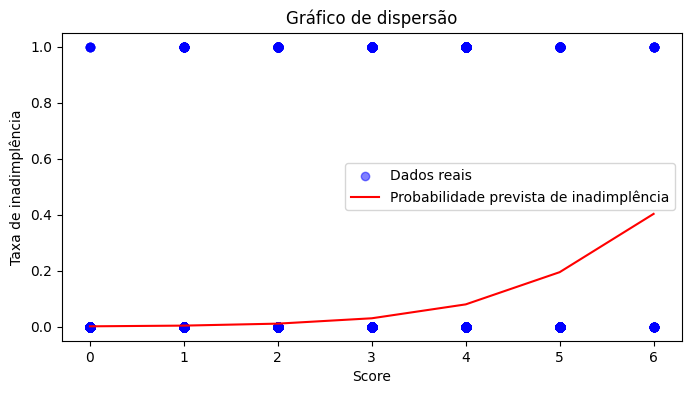

In [ ]:
#Grafico de probabilidade - Modelo de regressão logística
logistic_model = LogisticRegression()
logistic_model.fit(df[['risk_score']], df['default_flag'])

probabilities = logistic_model.predict_proba(df[['risk_score']])[:, 1]

# Plotando o gráfico de dispersão
plt.figure(figsize=(8, 4))

# Pontos de dados reais
plt.scatter(df['risk_score'], df['default_flag'], alpha=0.5, color='blue', label='Dados reais')

# Adicionando a curva de probabilidade da regressão logística
sorted_indices = np.argsort(df['risk_score'])
sorted_score_dummy = df['risk_score'].iloc[sorted_indices]
sorted_probabilities = probabilities[sorted_indices]
plt.plot(sorted_score_dummy, sorted_probabilities, color='red', label='Probabilidade prevista de inadimplência')

# Títulos e rótulos
plt.title('Gráfico de dispersão')
plt.xlabel('Score')
plt.ylabel('Taxa de inadimplência')

# Legendas
plt.legend()

# Exibindo o gráfico
plt.legend()

plt.show()

Esse gráfico mostra a relação entre o Sscore e a Taxa de Inadimplência:
* Pontos azuis acima da linha vermelha indicam clientes com alto "score de risco" e alta probabilidade de inadimplência.
* Pontos azuis abaixo da linha vermelha indicam clientes com baixo "score de risco" e baixa probabilidade de inadimplência.
* A curva vermelha representa a probabilidade média prevista de inadimplência para diferentes valores do "score de risco".

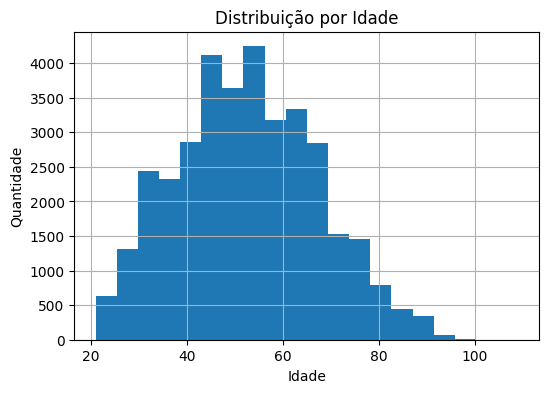

In [ ]:
import matplotlib.pyplot as plt

#Distribuição por Idade
plt.figure(figsize=(6, 4))
df['age'].hist(bins=20)
plt.title('Distribuição por Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

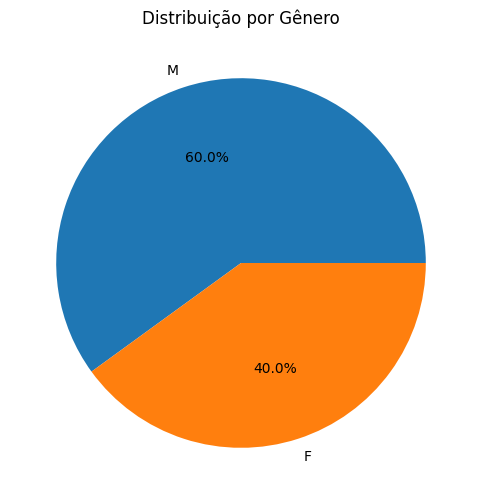

In [ ]:
df_full = pd.read_csv('user_info.csv')

#Distribuição por Gênero
gender_counts = df_full['sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribuição por Gênero')
plt.show()


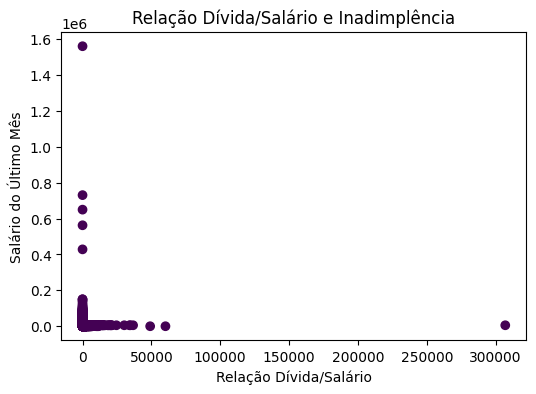

In [ ]:
#Gráfico de Dispersão
#Relação Dívida/Salário
plt.figure(figsize=(6, 4))
plt.scatter(df['debt_ratio'], df['last_month_salary'], c=df['default_flag'])
plt.title('Relação Dívida/Salário e Inadimplência')
plt.xlabel('Relação Dívida/Salário')
plt.ylabel('Salário do Último Mês')
plt.show()


Cada ponto no gráfico representa um registro da amostra.

A concentração dos pontos na área com baixo salário do último mês pode indicar que a inadimplência está mais relacionada à falta de capacidade de pagamento do que à quantidade de dívidas em si.

Este gráfico é uma ferramenta útil para visualizar e analisar a relação entre essas variáveis, e pode auxiliar a análise do risco de crédito e no desenvolvimento de estratégias para reduzir a inadimplência.

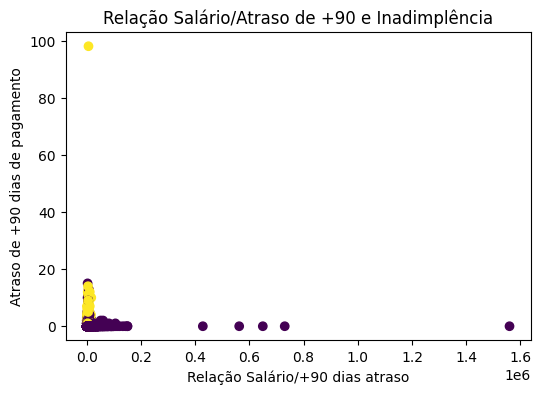

In [ ]:
#Gráfico de Dispersão
#Relação Salário/Atraso de +90 dias de pagamento
plt.figure(figsize=(6, 4))
plt.scatter(df['last_month_salary'], df['more_90_days_overdue'], c=df['default_flag'])
plt.title('Relação Salário/Atraso de +90 e Inadimplência')
plt.xlabel('Relação Salário/+90 dias atraso')
plt.ylabel('Atraso de +90 dias de pagamento')
plt.show()

A concentração dos pontos sugere que existe uma correlação entre as duas variáveis salário do último mês e atraso em pagamentos com mais de 90 dias mas não implica necessariamente causalidade.

A distribuição perto dos eixos sugere que clientes com menor salário tendem a ter valores mais altos de atraso em pagamentos com mais de 90 dias.